In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# 1. Carregar os data
url = "https://raw.githubusercontent.com/celsocrivelaro/simple-datasets/main/vendas.csv"
data = pd.read_csv(url)

In [38]:
data['Quantidade'] = pd.to_numeric(data['Quantidade'], errors='coerce')  # Converte para números, tratando erros como NaN
data['Quantidade'] = data['Quantidade'].fillna(0)  # Substitui NaN por 0
data['Quantidade'] = data['Quantidade'].astype(int)  # Converte para inteiro
tabela = data.head()
print(tabela)

         Data    Produto  Preço_Unitário  Quantidade Vendedor Região  \
0  16/10/2022  Produto D           11.73           2   Eliana  Norte   
1  09/12/2023  Produto D          100.73          18      Ana  Leste   
2  27/05/2023  Produto D          312.93          20    David  Norte   
3  01/07/2022  Produto D          105.21          13    Bruno    Sul   
4  01/05/2021  Produto D          181.36          14    David  Leste   

   Total_Venda  
0    23.460000  
1  1813.140000  
2  6258.600000  
3  1367.730000  
4  2727.223345  


In [39]:
# 2. Verificação Inicial
print("Exibindo as primeiras linhas do DataFrame:")
print(data.head())

print("\nExibindo as últimas linhas do DataFrame:")
print(data.tail())

Exibindo as primeiras linhas do DataFrame:
         Data    Produto  Preço_Unitário  Quantidade Vendedor Região  \
0  16/10/2022  Produto D           11.73           2   Eliana  Norte   
1  09/12/2023  Produto D          100.73          18      Ana  Leste   
2  27/05/2023  Produto D          312.93          20    David  Norte   
3  01/07/2022  Produto D          105.21          13    Bruno    Sul   
4  01/05/2021  Produto D          181.36          14    David  Leste   

   Total_Venda  
0    23.460000  
1  1813.140000  
2  6258.600000  
3  1367.730000  
4  2727.223345  

Exibindo as últimas linhas do DataFrame:
           Data    Produto  Preço_Unitário  Quantidade Vendedor Região  \
995  31/10/2021  Produto D           95.34          20    Bruno  Leste   
996  13/06/2021  Produto A          229.59           2    David  Norte   
997  14/04/2022  Produto A             NaN           0    Bruno  Leste   
998  07/06/2022  Produto A          364.85           9    Bruno  Norte   
999  14/08

In [40]:
print("\nExibindo as colunas Vendedor e Valor:")
print(data[['Vendedor', 'Total_Venda']])


Exibindo as colunas Vendedor e Valor:
    Vendedor  Total_Venda
0     Eliana    23.460000
1        Ana  1813.140000
2      David  6258.600000
3      Bruno  1367.730000
4      David  2727.223345
..       ...          ...
995    Bruno  1906.800000
996    David   493.212559
997    Bruno          NaN
998    Bruno  3527.020818
999    Bruno  2270.460000

[1000 rows x 2 columns]


In [41]:
# 3. Limpeza de data
# Verificar e tratar valores ausentes
print("\nVerificando valores ausentes:")
print(data.isnull().sum())
data = data.fillna(0)

# Corrigir formatos de data inadequados
data['Data'] = pd.to_datetime(data['Data'])

# Recalcular a coluna Total_Venda
data['Total_Venda'] = data['Preço_Unitário'] * data['Quantidade']
print(data[['Vendedor', 'Total_Venda']])


Verificando valores ausentes:
Data               0
Produto            0
Preço_Unitário    50
Quantidade         0
Vendedor           0
Região             0
Total_Venda       50
dtype: int64
    Vendedor  Total_Venda
0     Eliana        23.46
1        Ana      1813.14
2      David      6258.60
3      Bruno      1367.73
4      David      2539.04
..       ...          ...
995    Bruno      1906.80
996    David       459.18
997    Bruno         0.00
998    Bruno      3283.65
999    Bruno      2270.46

[1000 rows x 2 columns]


C:\Users\mrsilva\AppData\Local\Temp\ipykernel_11116\2399176911.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Data'] = pd.to_datetime(data['Data'])


In [42]:
# 4. Análise Exploratória
# 2. Calcular estatísticas básicas
estatisticas_basicas = data.describe()

# Exibir as estatísticas básicas
print(estatisticas_basicas)

                                Data  Preço_Unitário   Quantidade  Total_Venda
count                           1000     1000.000000  1000.000000  1000.000000
mean   2022-06-23 10:53:45.600000256      245.695750    10.157000  2619.018770
min              2021-01-01 00:00:00        0.000000     0.000000     0.000000
25%              2021-09-06 18:00:00      117.490000     5.000000   708.950000
50%              2022-06-30 12:00:00      252.250000    10.000000  1919.120000
75%              2023-04-01 06:00:00      379.317500    15.000000  4133.960000
max              2023-12-30 00:00:00      498.870000    20.000000  9671.000000
std                              NaN      148.715718     6.039108  2318.378575


In [46]:
# 5. data Faltantes e Duplicados
# Verificar duplicatas
print("\nVerificando data duplicados:")
print(data.duplicated().sum())

# Remover duplicatas, se houver
data = data.drop_duplicates()


Verificando data duplicados:
0


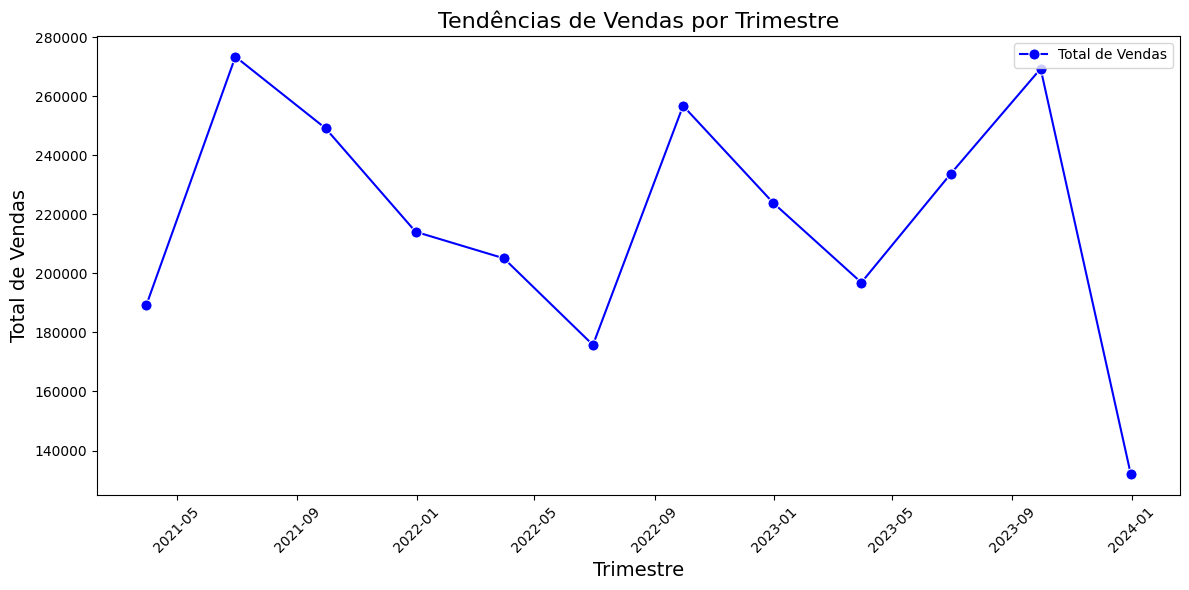

C:\Users\mrsilva\AppData\Local\Temp\ipykernel_11116\4159267521.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Vendedor', y='Total_Venda', data=data, ci=None)


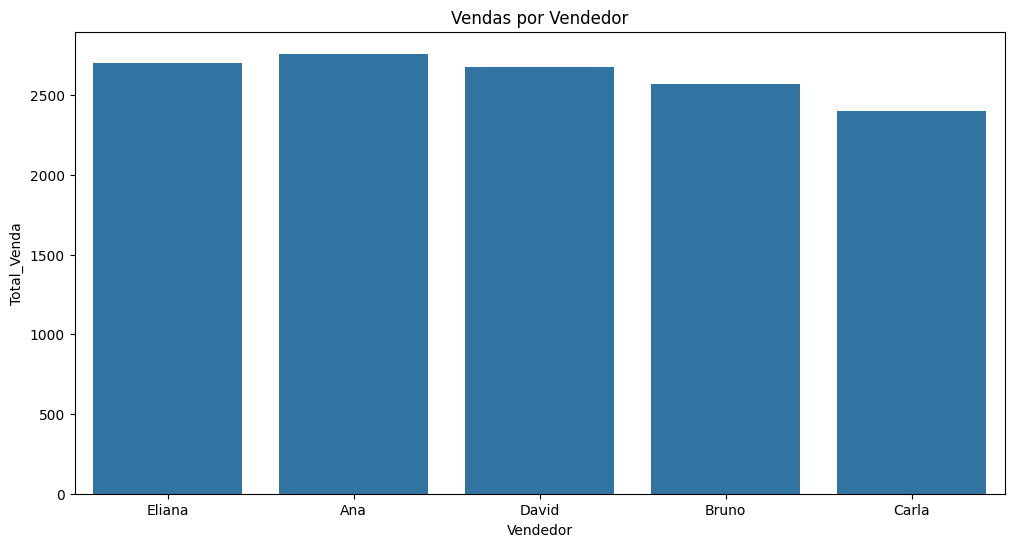

In [51]:
# 6. Visualização de data (opcional)
data_trimestrais = data.groupby(pd.Grouper(key='Data', freq='Q')).sum()

# Gráfico de tendências de vendas ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(x=data_trimestrais.index, y='Total_Venda', data=data_trimestrais, color='blue', marker='o', markersize=8, label='Total de Vendas')
plt.title('Tendências de Vendas por Trimestre', fontsize=16)
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('Total de Vendas', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de barras mostrando as vendas por vendedor
plt.figure(figsize=(12, 6))
sns.barplot(x='Vendedor', y='Total_Venda', data=data, ci=None)
plt.title('Vendas por Vendedor')
plt.show()
